In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

img=cv.imread('test_messi.jpg')
#scaling the image
img=img/255
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [2]:
print (type(img))
a=np.array(img)
#print (a)

<class 'numpy.ndarray'>


Enter the number of colors in the compressed image. default = 16
4
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
5
4
3
2
1


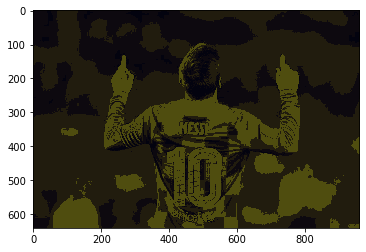

In [3]:
e=np.reshape(a,(614400,3))
#print(len(e))
rows=e.shape[0]
cols=e.shape[1]
clusters = 16
clusters = int(input('Enter the number of colors in the compressed image. default = 16\n')) 
means = np.zeros((clusters, cols))
print(means)
#randomly selecting the point
for i in range(clusters): 
    rand1 = int(np.random.random(1)*10) 
    rand2 = int(np.random.random(1)*8) 
    means[i] = e[rand1] 
    means[i] = e[rand2]
        
###distance formula
def distance(x1,y1,x2,y2): 
 
	dist = np.square(x1 - x2) + np.square(y1 - y2) 
	dist = np.sqrt(dist) 

	return dist 
###K-mean-algorithm#################################################
iterations = 5
index = np.zeros(rows)
print(index)

	# k-means algorithm. 
while(iterations > 0): 
    print(iterations)
    for j in range(len(e)): 
        minv = 1000
        temp = None

        for k in range(clusters): 

            x1 = e[j, 0]
            y1 = e[j, 1]
            x2 = means[k, 0]
            y2 = means[k, 1]
            if(distance(x1,y1,x2,y2)<minv):
                minv = distance(x1,y1,x2,y2) 
                temp = k 
                index[j] = k 

    for k in range(clusters): 

        sumx = 0
        sumy = 0
        count = 0

        for j in range(len(e)): 

            if(index[j] == k): 
                sumx += e[j, 0] 
                sumy += e[j, 1] 
                count += 1

        if(count == 0): 
            count = 1

        means[k, 0] = float(sumx / count) 
        #print(means)
        means[k, 1] = float(sumy / count)	 
        #print(means)
    iterations -= 1
# recovering the compressed image by 
# assigning each pixel to its corresponding centroid. 
centroid = np.array(means)
recovered = centroid[index.astype(int), :] 

# getting back the 3d matrix (row, col, rgb(3)) 
recovered = np.reshape(recovered, (img.shape[0], img.shape[1],img.shape[2]))
#print(recovered)

# plotting the compressed image. 
plt.imshow(recovered) 
plt.show()
#show the image colors
#img1 = Image.fromarray(recovered, 'RGB')
#img1.save('my.png')
#img1.show()

